In [75]:
#imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
#import regression models
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [77]:
#import train and test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [78]:
#checking the datasets
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [79]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [80]:
#checking data types of columns
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [81]:
#size of data sets
print(train.shape)
print(test.shape)

(550068, 12)
(233599, 11)


In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [83]:
#checking for null values
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

As we can see, there are a lot of null values in Purchase_Category_2 and Purchase_Category_3

In [84]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [85]:
#function to check percentage of null values
def missing(df):
    missing_values=df.isnull().sum()
    missing_percentage=missing_values*100/len(df['User_ID'])
    missing_percentage=missing_percentage.sort_values(ascending=False)
    return missing_percentage

In [86]:
missing(train)

Product_Category_3            69.672659
Product_Category_2            31.566643
Purchase                       0.000000
Product_Category_1             0.000000
Marital_Status                 0.000000
Stay_In_Current_City_Years     0.000000
City_Category                  0.000000
Occupation                     0.000000
Age                            0.000000
Gender                         0.000000
Product_ID                     0.000000
User_ID                        0.000000
dtype: float64

In [87]:
missing(test)

Product_Category_3            69.590195
Product_Category_2            30.969311
Product_Category_1             0.000000
Marital_Status                 0.000000
Stay_In_Current_City_Years     0.000000
City_Category                  0.000000
Occupation                     0.000000
Age                            0.000000
Gender                         0.000000
Product_ID                     0.000000
User_ID                        0.000000
dtype: float64

Since, almost 70% data is missing in Product_Category_3 , we will be dropping this column.

# Exploratory Data Analysis

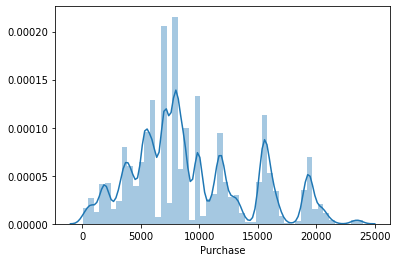

In [88]:
#distribution of purchase variable
sns.distplot(train.Purchase)

In [89]:
#select numeric features
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

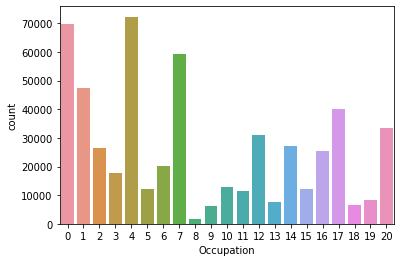

In [90]:
#distrbution of variables
sns.countplot(train.Occupation)

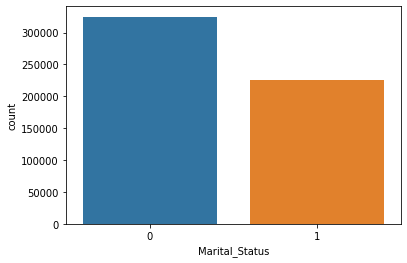

In [91]:
sns.countplot(train.Marital_Status)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

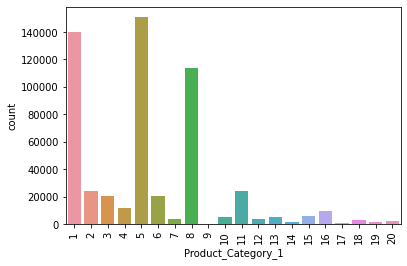

In [92]:
sns.countplot(train.Product_Category_1)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

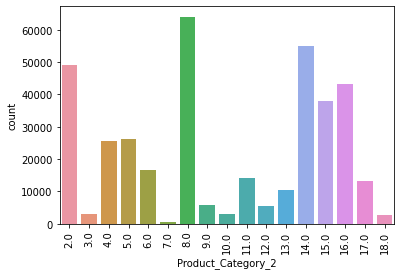

In [93]:
sns.countplot(train.Product_Category_2)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

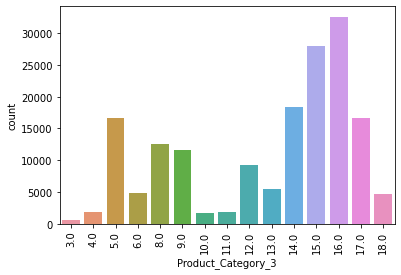

In [94]:
sns.countplot(train.Product_Category_3)
plt.xticks(rotation=90)

In [95]:
#visualizing distribution of categorical columns

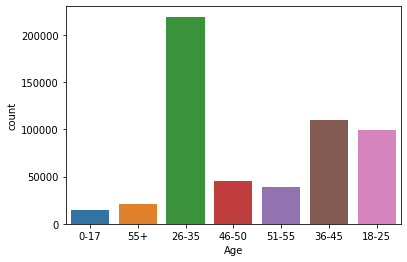

In [96]:
sns.countplot(train.Age)

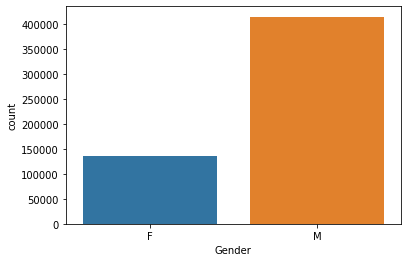

In [97]:
sns.countplot(train.Gender)

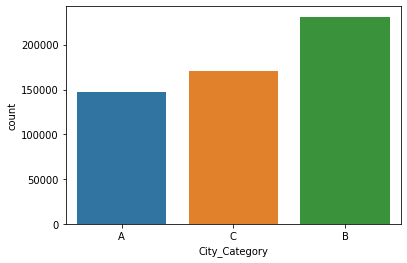

In [98]:
sns.countplot(train.City_Category)

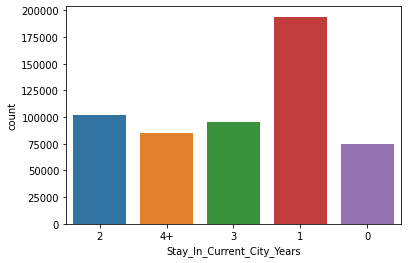

In [99]:
sns.countplot(train.Stay_In_Current_City_Years)

In [100]:
#observing relationship of the variables with the Purchase variable

In [101]:
#relationship with categorical variables

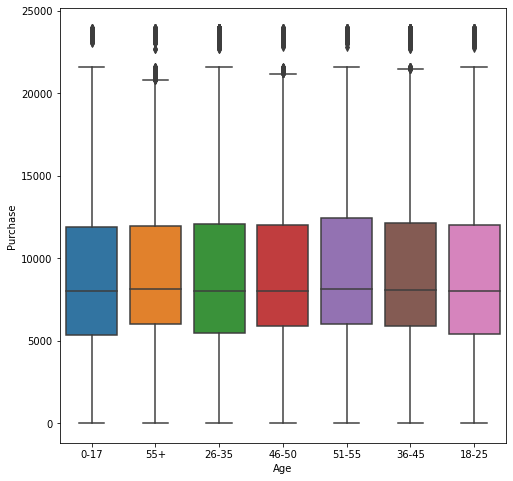

In [102]:
#Age vs Purchase
plt.figure(figsize=(8,8))
sns.boxplot(x='Age',y='Purchase',data=train)

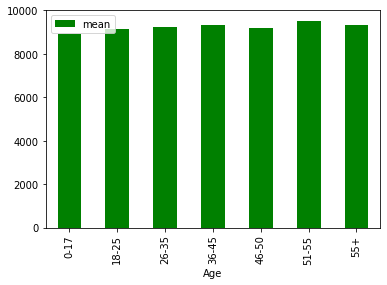

In [103]:
train.groupby('Age')['Purchase'].agg(['mean']).plot.bar(color='g')

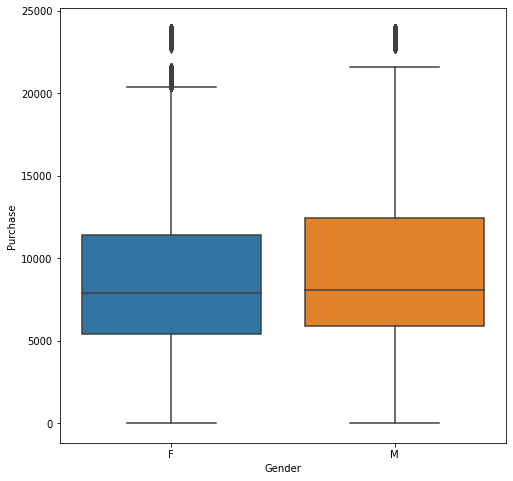

In [104]:
#Gender vs Purchase
plt.figure(figsize=(8,8))
sns.boxplot(x='Gender',y='Purchase',data=train)

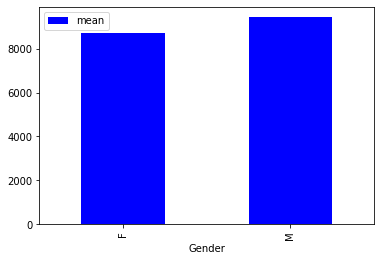

In [105]:
train.groupby('Gender')['Purchase'].agg(['mean']).plot.bar(color='b')

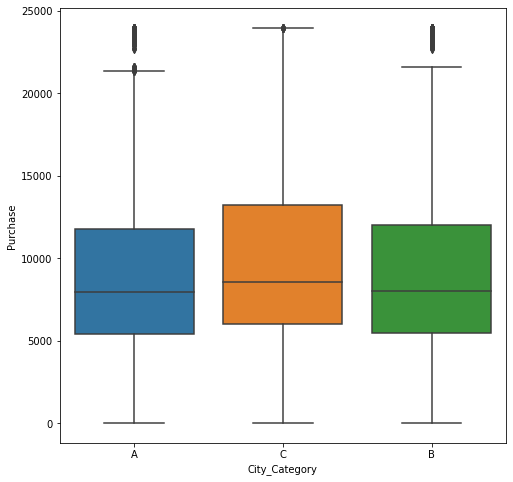

In [106]:
#City Category vs Purchase
plt.figure(figsize=(8,8))
sns.boxplot(x='City_Category',y='Purchase',data=train)

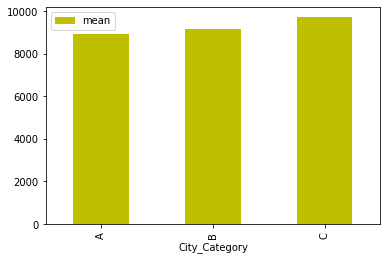

In [107]:
train.groupby('City_Category')['Purchase'].agg(['mean']).plot.bar(color='y')

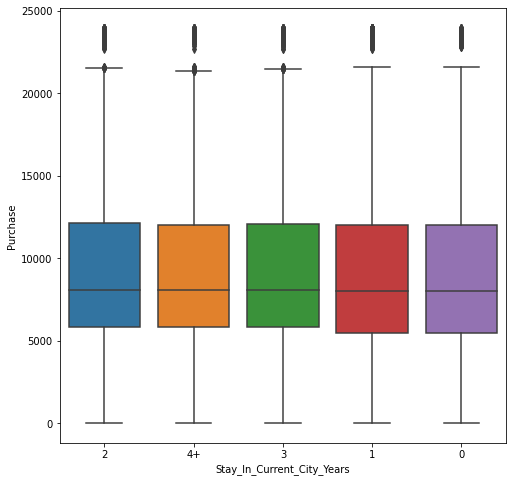

In [108]:
#Stay_In_Current_City_Years vs Purchase
plt.figure(figsize=(8,8))
sns.boxplot(x='Stay_In_Current_City_Years',y='Purchase',data=train)

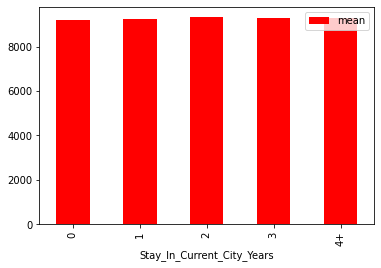

In [109]:
train.groupby('Stay_In_Current_City_Years')['Purchase'].agg(['mean']).plot.bar(color='r')

In [110]:
#relationship of Purchase variable with numerical variables with mean aggregate

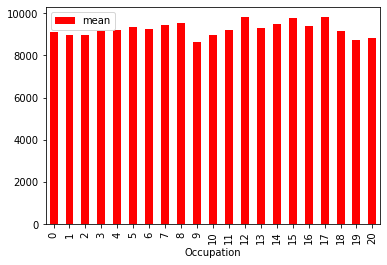

In [111]:
train.groupby('Occupation')['Purchase'].agg(['mean']).plot.bar(color='r')

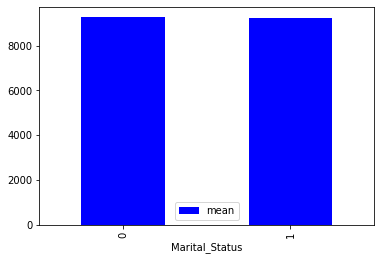

In [112]:
train.groupby('Marital_Status')['Purchase'].agg(['mean']).plot.bar(color='b')

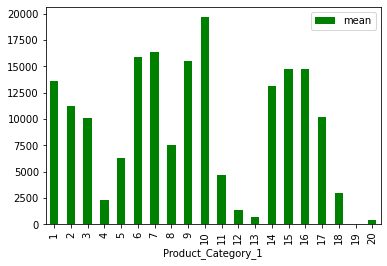

In [113]:
train.groupby('Product_Category_1')['Purchase'].agg(['mean']).plot.bar(color='g')

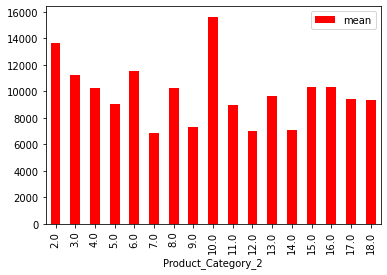

In [114]:
train.groupby('Product_Category_2')['Purchase'].agg(['mean']).plot.bar(color='r')

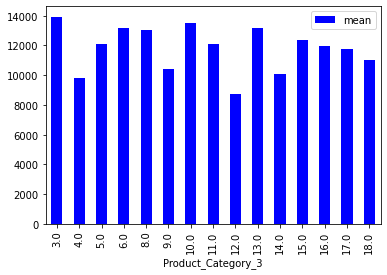

In [115]:
train.groupby('Product_Category_3')['Purchase'].agg(['mean']).plot.bar(color='b')

# Data Pre-Processing

In [116]:
#first we will join train and test set so that preprocessing has to be done only once.
#we are creating a train and test column on the datasets to be able to distinguish them

train['source']='train'
test['source']='test'

data = pd.concat([train,test], ignore_index = True, sort = False)

In [117]:
data.shape

(783667, 13)

In [118]:
#checking the percentage of null values using missing function defined above
missing(data)

Product_Category_3            69.648078
Product_Category_2            31.388587
Purchase                      29.808452
source                         0.000000
Product_Category_1             0.000000
Marital_Status                 0.000000
Stay_In_Current_City_Years     0.000000
City_Category                  0.000000
Occupation                     0.000000
Age                            0.000000
Gender                         0.000000
Product_ID                     0.000000
User_ID                        0.000000
dtype: float64

About 70% data is missing in Product_Category_3 column, we will drop this column. We will impute the missing values in Product_Category_2 column. Purchase column has missing values because Purchase column was not there in test set.

In [119]:
data.drop(["Product_Category_3"],axis=1,inplace=True)

In [120]:
# Replacing null values in Product_Category_2 by creating a new category '-2.0'
data["Product_Category_2"]= data["Product_Category_2"].fillna(-2.0).astype("float")

# Feature Engineering

Encoding categorical variables to numerical variables

In [121]:
gender_dict = {'F':0, 'M':1}
data["Gender"] = data["Gender"].apply(lambda x: gender_dict[x])

data["Gender"].value_counts()

1    590031
0    193636
Name: Gender, dtype: int64

In [122]:
city={'A':0,'B':1,'C':2}
data['City_Category']=data['City_Category'].apply(lambda x: city[x])
data['City_Category'].value_counts()

1    329739
2    243684
0    210244
Name: City_Category, dtype: int64

In [123]:
age_dict={'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
data['Age']=data['Age'].apply(lambda x:age_dict[x])
data['Age'].value_counts()

2    313015
3    156724
1    141953
4     65278
5     54784
6     30579
0     21334
Name: Age, dtype: int64

In [124]:
def stay(Stay_In_Current_City_Years):
        if Stay_In_Current_City_Years == '4+':
            return 4
        else:
            return Stay_In_Current_City_Years
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].apply(stay).astype(int)

data['Stay_In_Current_City_Years'].value_counts()

1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

# Exporting cleaned data

In [125]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_clean.csv",index=False)
test.to_csv("test_clean.csv",index=False)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [126]:
train= pd.read_csv('train_clean.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,8370.0
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,15200.0
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,1422.0
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,1057.0
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,7969.0


In [128]:
test= pd.read_csv('test_clean.csv')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000004,P00128942,1,4,7,1,2,1,1,11.0,NaN
1,1000009,P00113442,1,2,17,2,0,0,3,5.0,NaN
2,1000010,P00288442,0,3,1,1,4,1,5,14.0,NaN
3,1000010,P00145342,0,3,1,1,4,1,4,9.0,NaN
4,1000011,P00053842,0,2,1,2,1,0,4,5.0,NaN


In [129]:
# dropping columns User_ID and Product_ID
train.drop(['User_ID','Product_ID'],axis =1, inplace = True)
test.drop(['User_ID','Product_ID','Purchase'],axis =1, inplace = True)

In [131]:
X = train.drop(['Purchase'],axis=1)
y = train['Purchase']

# Model

In [133]:
#splitting data
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

#random forest regressor
rf_regressor = RandomForestRegressor(n_jobs=-1, 
                              random_state=10)

rf_regressor.fit(X_train, y_train)
predictions = rf_regressor.predict(X_test)

In [141]:
#accuracy scores
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
print("Mean_absolute_error_: {}\n Root_Mean_Square_error: {}".format(MAE, np.sqrt(MSE)))

Mean_absolute_error_: 2211.5867604395976
 Root_Mean_Square_error: 3028.4737248231104


In [138]:
#using XGBoost Regressor
import xgboost as xgb
xgbr = xgb.XGBRegressor()

In [139]:

xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

[11:10:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [140]:
#accuracy scores
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
print("Mean_absolute_error_: {}\n Root_Mean_Square_error: {}".format(MAE, np.sqrt(MSE)))

Mean_absolute_error_: 2278.330124532446
 Root_Mean_Square_error: 3013.6226532087558


# Predictions for test set

In [142]:
#We will predict the test set Purchase column based on our random forest regressor model
test_predictions = rf_regressor.predict(test)